<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/9_1%EA%B0%95(CNN_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8576 - loss: 0.4655 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9802 - loss: 0.0617 - val_accuracy: 0.9860 - val_loss: 0.0485
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9855 - val_loss: 0.0493
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9869 - val_loss: 0.0464
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9825 - loss: 0.0530
Test accuracy: 0.9873999953269958


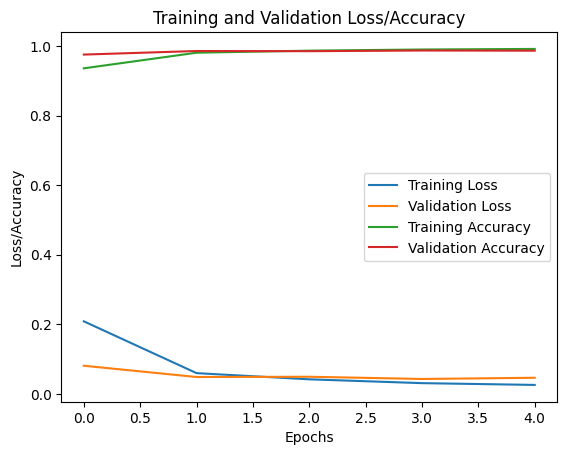

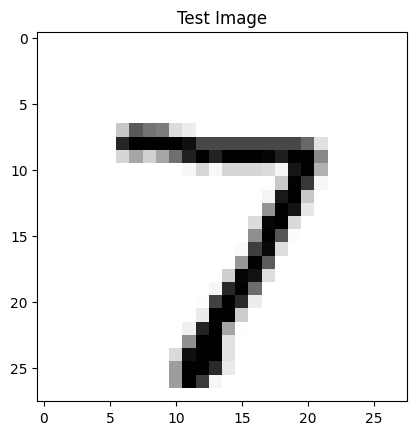

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
predicted_class= [[1.0381292e-07 1.5771305e-06 5.1300099e-06 9.4227544e-06 5.0058901e-10
  8.6369973e-08 1.7991356e-12 9.9998260e-01 1.1444705e-07 9.0918672e-07]]
Predicted Label: 7
True Label: 7


In [ ]:
# TensorFlow와 Keras를 사용하기 위해 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 형태 변경: (batch_size, height, width, channels)
# MNIST는 2D 이미지이므로 채널을 추가합니다.
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# 레이블을 정수형으로 유지합니다.
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# CNN 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10개 클래스

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# 훈련 과정에서의 손실 및 정확도 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# 예측할 이미지 선택
n = 0  # 0번 이미지를 선택
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
plt.title('Test Image')
plt.show()

# 모델 예측
predicted_class = model.predict(x_test[n].reshape(1, 28, 28, 1))
print("predicted_class=", predicted_class)

#predicted_class 배열에서 가장 큰 값의 인덱스를 반환합니다.
predicted_label = tf.argmax(predicted_class, axis=1).numpy()[0]
print('Predicted Label:', predicted_label)
print('True Label:', y_test[n])


In [ ]:
import pandas as pd

# 예제 데이터프레임
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}

df = pd.DataFrame(data)
print("원본 데이터프레임:\n", df)

#axis=0으로 합계 계산 (행 기준)
column_sum = df.sum(axis=0)
print("\naxis=0 (열 기준) 합계:\n", column_sum)

#axis=1로 합계 계산 (열 기준)
row_sum = df.sum(axis=1)
print("\naxis=1 (행 기준) 합계:\n", row_sum)


원본 데이터프레임:
    A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

axis=0 (열 기준) 합계:
 A     6
B    15
C    24
dtype: int64

axis=1 (행 기준) 합계:
 0    12
1    15
2    18
dtype: int64
